In [334]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  

In [335]:
pip install yfinance

In [336]:
import yfinance as yf

In [337]:
sp = yf.download('SNP', start='2020-12-25', end='2022-01-13')

[*********************100%***********************]  1 of 1 completed


In [338]:
sp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-28,45.020000,45.480000,45.009998,45.160000,41.394691,214400
2020-12-29,45.320000,45.459999,44.980000,45.049999,41.293861,193800
2020-12-30,45.220001,45.520000,45.150002,45.220001,41.449692,141900
2020-12-31,44.799999,44.880001,44.480000,44.599998,40.881382,171500
2021-01-04,44.299999,45.279999,44.299999,44.860001,41.119705,294600
...,...,...,...,...,...,...
2022-01-06,49.099998,49.480000,49.000000,49.459999,49.459999,107900
2022-01-07,49.599998,50.279999,49.599998,50.220001,50.220001,123400
2022-01-10,49.810001,49.950001,49.259998,49.299999,49.299999,81700


In [339]:
sp.reset_index()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-28,45.020000,45.480000,45.009998,45.160000,41.394691,214400
1,2020-12-29,45.320000,45.459999,44.980000,45.049999,41.293861,193800
2,2020-12-30,45.220001,45.520000,45.150002,45.220001,41.449692,141900
3,2020-12-31,44.799999,44.880001,44.480000,44.599998,40.881382,171500
4,2021-01-04,44.299999,45.279999,44.299999,44.860001,41.119705,294600
...,...,...,...,...,...,...,...
259,2022-01-06,49.099998,49.480000,49.000000,49.459999,49.459999,107900
260,2022-01-07,49.599998,50.279999,49.599998,50.220001,50.220001,123400
261,2022-01-10,49.810001,49.950001,49.259998,49.299999,49.299999,81700
262,2022-01-11,50.029999,50.840000,49.700001,50.820000,50.820000,86800


In [340]:
sp = sp.drop(["Open",	"High",	"Low",	"Adj Close",	"Volume"], axis = 1)
sp

,Close
Date,
2020-12-28,45.160000
2020-12-29,45.049999
2020-12-30,45.220001
2020-12-31,44.599998
2021-01-04,44.860001
...,...
2022-01-06,49.459999
2022-01-07,50.220001
2022-01-10,49.299999


In [341]:
# importing the dickey fuller test from stats models

In [342]:
from statsmodels.tsa.stattools import adfuller

In [343]:
# defining the adf test for my data, and telling the function to print the DF stat, p and critical values, and using a for loop for the 4th result
# indicating the unit (%) and the number of decimal places:

In [344]:
def adf_test(sp):
    result = adfuller(sp.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [345]:
print('ADF Test: S&P 500 time series')
adf_test(sp['Close'])

ADF Test: S&P 500 time series
ADF Statistics: -2.839053
p-value: 0.052908
Critical values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [346]:
# p value too big for the null to be disproven, that is here we see that the series is non-stationary, I've therefore applied first differencing:

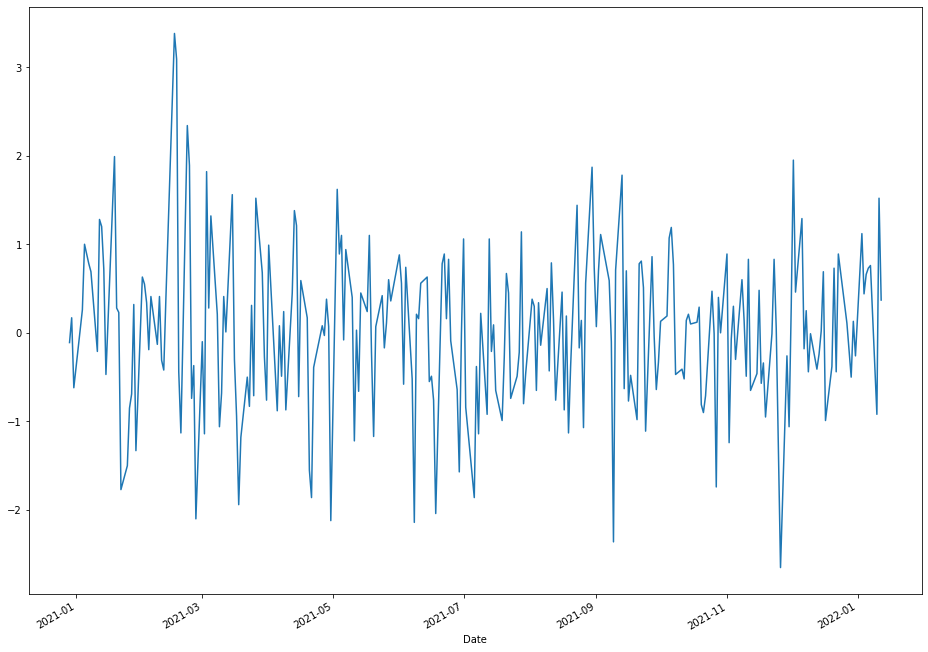

In [347]:
sp['first diff'] = sp['Close'] - sp['Close'].shift()  
sp['first diff'].plot(figsize=(16, 12))

In [348]:
sp = sp.dropna()

In [349]:
# after which the data appears stationary according to the df test:

In [350]:
print('ADF Test: S&P 500 time series')
adf_test(sp['first diff'])

ADF Test: S&P 500 time series
ADF Statistics: -14.208700
p-value: 0.000000
Critical values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [351]:
# Sources: How to download S&P 500 data from Yahoo Finance using Python (Trader Court)

In [352]:
sp

,Close,first diff
Date,,
2020-12-29,45.049999,-0.110001
2020-12-30,45.220001,0.170002
2020-12-31,44.599998,-0.620003
2021-01-04,44.860001,0.260002
2021-01-05,45.860001,1.000000
...,...,...
2022-01-06,49.459999,0.730000
2022-01-07,50.220001,0.760002
2022-01-10,49.299999,-0.920002


In [353]:
ts = sp

In [354]:
ts = ts.drop(["Close"], axis = 1)

In [355]:
# now importing the sentiment data:

In [356]:
sen = pd.read_csv("sentiment_time_series_daily_nicedates.csv", parse_dates=['numdate'], dayfirst = True)

In [357]:
sen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   numdate   347 non-null    datetime64[ns]
 1   polarity  347 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.5 KB


In [358]:
ts

,first diff
Date,
2020-12-29,-0.110001
2020-12-30,0.170002
2020-12-31,-0.620003
2021-01-04,0.260002
2021-01-05,1.000000
...,...
2022-01-06,0.730000
2022-01-07,0.760002
2022-01-10,-0.920002


In [359]:
ts = ts.reset_index()

In [360]:
# converting all dates to datetimes and merging the dataframes

In [361]:
ts['Date']= pd.to_datetime(ts['Date'])

In [362]:
ts["numdate"] = ts["Date"]

In [363]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        263 non-null    datetime64[ns]
 1   first diff  263 non-null    float64       
 2   numdate     263 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 6.3 KB


In [364]:
df = ts.merge(sen, how="outer", on="numdate")

In [365]:
df

,Date,first diff,numdate,polarity
0,2020-12-29,-0.110001,2020-12-29,NaN
1,2020-12-30,0.170002,2020-12-30,NaN
2,2020-12-31,-0.620003,2020-12-31,NaN
3,2021-01-04,0.260002,2021-01-04,0.099399
4,2021-01-05,1.000000,2021-01-05,0.118021
...,...,...,...,...
365,NaT,NaN,2021-12-18,0.137196
366,NaT,NaN,2021-12-19,0.139147
367,NaT,NaN,2021-12-24,0.105533
368,NaT,NaN,2021-12-25,0.098388


In [366]:
df = df.drop(["Date"], axis = 1)

In [367]:
df

,first diff,numdate,polarity
0,-0.110001,2020-12-29,NaN
1,0.170002,2020-12-30,NaN
2,-0.620003,2020-12-31,NaN
3,0.260002,2021-01-04,0.099399
4,1.000000,2021-01-05,0.118021
...,...,...,...
365,NaN,2021-12-18,0.137196
366,NaN,2021-12-19,0.139147
367,NaN,2021-12-24,0.105533
368,NaN,2021-12-25,0.098388


In [368]:
df = df.dropna()

In [369]:
df

,first diff,numdate,polarity
3,0.260002,2021-01-04,0.099399
4,1.000000,2021-01-05,0.118021
5,0.889999,2021-01-06,0.108945
6,0.779999,2021-01-07,0.118736
7,0.690002,2021-01-08,0.108152
...,...,...,...
250,0.110001,2021-12-27,0.121795
251,-0.200001,2021-12-28,0.095049
252,-0.500000,2021-12-29,0.114317
253,0.130001,2021-12-30,0.087820


In [370]:
df = df.set_index(df["numdate"])

In [371]:
df

,first diff,numdate,polarity
numdate,,,
2021-01-04,0.260002,2021-01-04,0.099399
2021-01-05,1.000000,2021-01-05,0.118021
2021-01-06,0.889999,2021-01-06,0.108945
2021-01-07,0.779999,2021-01-07,0.118736
2021-01-08,0.690002,2021-01-08,0.108152
...,...,...,...
2021-12-27,0.110001,2021-12-27,0.121795
2021-12-28,-0.200001,2021-12-28,0.095049
2021-12-29,-0.500000,2021-12-29,0.114317


In [372]:
df = df.drop(["numdate"], axis = 1)

In [373]:
df

,first diff,polarity
numdate,,
2021-01-04,0.260002,0.099399
2021-01-05,1.000000,0.118021
2021-01-06,0.889999,0.108945
2021-01-07,0.779999,0.118736
2021-01-08,0.690002,0.108152
...,...,...
2021-12-27,0.110001,0.121795
2021-12-28,-0.200001,0.095049
2021-12-29,-0.500000,0.114317


In [374]:
df["snp"] = df["first diff"]
df = df.drop(["first diff"], axis = 1)
df

,polarity,snp
numdate,,
2021-01-04,0.099399,0.260002
2021-01-05,0.118021,1.000000
2021-01-06,0.108945,0.889999
2021-01-07,0.118736,0.779999
2021-01-08,0.108152,0.690002
...,...,...
2021-12-27,0.121795,0.110001
2021-12-28,0.095049,-0.200001
2021-12-29,0.114317,-0.500000


In [375]:
# now performing the granger causality test
# Toda, H. Y and T. Yamamoto (1995). Statistical inferences in vector autoregressions with possibly integrated processes. Journal of Econometrics, 66, 225-250.

In [376]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# I chose a maximum lag of 2, as I am looking for people's immediate reaction and it's impact on the market:

In [377]:
maxlag=2
test = 'ssr_chi2test'

In [378]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
# with help from Wilson Mupfururirwa on StackOverflow

In [379]:
grangers_causation_matrix(df, variables = df.columns)

,polarity_x,snp_x
polarity_y,1.0000,0.5753
snp_y,0.2723,1.0000


In [380]:
# polarity_y and snp_y indicate the responses, and polarity_x and snp_x the predictors

In [381]:
# as neither of the values is less than 0.05, we cannot reject the null hypothesis that sentiment in r/stocks is not 
# predictive of the value of the S&P index.